# ANALYSE WORD2VEC D'UNE BASE DE DONNEES "MOVIES"

# Introduction  

Dans le cadre de ce dernier TP portant sur Word2Vec, l’objectif est de quitter les bases de données “classiques” pour travailler sur un type de données plus complexe : le **texte**.  
Nous utilisons pour cela la base publique **“The Movies Dataset”** (Kaggle), qui contient environ 50 000 films et de nombreuses informations associées, dont des **descriptions textuelles (overview)**, des variables numériques (budget, revenue, popularity, vote_average, …) et des variables catégorielles.

Dans ce notebook, le travail se structure autour de deux grands axes :  

1. **Construire un premier modèle de Machine Learning supervisé “classique”**, basé uniquement sur des variables non textuelles (par exemple vote_average, vote_count, adult, video, ln_vote_count), pour prédire un indicateur de succès financier, ici **ln_revenue**.  
   L’objectif est d’obtenir une **baseline propre**, avec séparation train/test, choix de métriques (RMSE, MAE, R²) et comparaison de plusieurs modèles (régression linéaire, RandomForest).  

2. **Explorer l’information sémantique contenue dans les descriptions de films** à l’aide d’un modèle **Word2Vec**, puis d’outils d’analyse exploratoire (ACP, clustering).  
   L’idée est de comprendre comment les mots se structurent dans l’espace des embeddings, d’identifier des **groupes thématiques** et de discuter, en perspective, de la façon dont ces embeddings pourraient enrichir un modèle prédictif.

Concrètement, le notebook suit les grandes étapes suivantes :  
- chargement et nettoyage des données,  
- mise en place d’un modèle de ML supervisé sur variables quantitatives (sans texte),  
- apprentissage d’embeddings Word2Vec sur les descriptions (overview ) ,  
- exploration des embeddings (ACP, clustering K-Means, indicateurs de qualité, radar des clusters)


## Table des matières
## 1. Données & preprocessing

### 1.1 Chargement & sélection des variables  

- Import du fichier movies_metadata.csv.  
- Sélection des colonnes utiles : revenue, budget, popularity, vote_average, etc.  
- Récupération de la variable texte principale : overview.

### 1.2 Nettoyage / mise en forme  

- Gestion des **valeurs manquantes** (drop / imputation).  
- Conversion des types (ex. revenue en numérique, filtrage valeurs aberrantes).  
- Création de variables dérivées (ex. ln_revenue, ln_budget, ratios éventuels).

### 1.3 Mini EDA (Exploratory Data Analysis)  

- Statistiques descriptives de base.  
- Distributions de revenue, ln_revenue, budget, etc.  
- Matrice de corrélation pour voir les liens entre variables.  
- Quelques visualisations (histogrammes, scatterplots).

> Objectif : comprendre *sur quoi* je travaille avant de brancher les modèles.


## 2. Modèle de prédiction sur variables quantitatives

### 2.1 Construction du dataset ML  

- Définition de X (features numériques) et y (ln_revenue).  
- Découpage **train / test** (train_test_split).  
- Standardisation / normalisation si nécessaire (StandardScaler).

### 2.2 Baseline “simple”  

- Mise en place d’un **modèle baseline** (ex. régression linéaire).  
- Objectif : avoir une **référence** pour juger l’apport de la Random Forest.

### 2.3 Random Forest Regressor  

- Création de la **RandomForestRegressor** (choix des hyperparamètres).  
- Entraînement sur les données d’entraînement.  
- Évaluation sur le jeu de test :  
  - métriques (RMSE, MAE, R², selon ce qui est calculé).

### 2.4 Validation croisée & robustesse  

- Mise en place de la **cross-validation** (cross_val_score, etc.).  
- Comparaison scores CV vs score simple train/test.  
- Mini conclusion : est-ce que le modèle quanti tient la route ?

> Idée : montrer que je sais faire un pipeline ML propre avant de m’amuser avec le texte.


## 3. Apprentissage des embeddings Word2Vec

### 3.1 Préparation du texte (overview)  

- Nettoyage de la colonne overview :  
  - passage en minuscules,  
  - suppression de la ponctuation,  
  - gestion des stopwords,  
  - tokenisation.  
- Résultat : une **liste de listes de mots** (corpus tokenisé).

### 3.2 Construction du corpus  

- Vérification du corpus :  
  - longueur moyenne des phrases,  
  - quelques exemples de phrases tokenisées.

### 3.3 Entraînement du modèle Word2Vec  

- Entraînement de Word2Vec avec les paramètres utilisés :  
  - vector_size, window, min_count, sg, epochs, etc.  
- Explication rapide des choix :  
  - fenêtre large, skip-gram (sg=1), fréquence minimale, etc.  
- Rappel : un mot = un vecteur dans un espace de dimension vector_size.

### 3.4 Tests de similarité & sanity-check  

- Calcul de similarité entre paires de mots (similarity).  
- Recherche de mots proches (most_similar).  
- Commentaire rapide : est-ce que les résultats sont cohérents ?

> Objectif : valider que le modèle Word2Vec a appris quelque chose de “logique”.


## 4. Exploration des embeddings : PCA & clustering

### 4.1 Matrice d’embeddings  

- Sélection d’un sous-ensemble de mots (ex. top_words).  
- Construction de la matrice X contenant les vecteurs de ces mots.  
- Standardisation : X_scaled = StandardScaler().fit_transform(X).

### 4.2 PCA (Analyse en Composantes Principales)  

- Application d’une PCA sur X_scaled.  
- Analyse de la **variance expliquée** par composante.  
- Graphique “ébouli des valeurs propres”.  
- Visualisation en 2D/3D (mots projetés sur les premières composantes).

### 4.3 Choix du nombre de clusters (k)  

- Application de K-Means pour plusieurs valeurs de k.  
- Courbe **Elbow** (inertie vs k).  
- Calcul des indices de qualité de clustering :  
  - **Silhouette moyenne**,  
  - **Davies–Bouldin**,  
  - **Calinski–Harabasz**.  
- Sélection du **k optimal** (ex. max de la silhouette).

### 4.4 Clustering des mots & interprétation  

- Application de K-Means avec k_opt.  
- Attribution d’un cluster à chaque mot.  
- Pour chaque cluster :  
  - liste des mots principaux,  
  - tentative de **nommer le cluster** (thèmes : action, romance, horreur, etc.).  

> C’est ici que je montre comment le vocabulaire des films se structure en “univers” thématiques.

### 4.5 Visualisation t-SNE  

- Application de **t-SNE** (2D) sur les embeddings ou sur les composantes PCA.  
- Visualisation via scatterplot (Seaborn / Matplotlib).  
- Ajout de la couleur par cluster pour mieux voir les groupes.  
- Annotation de quelques mots clés sur le graphique.


---

## 1. DONNÉES ET PREPROCESSING 

Dans cette première partie, l’objectif est de présenter le jeu de données utilisé et les principales transformations réalisées avant toute modélisation. Je commence par charger le fichier movies_metadata.csv, décrire les variables clés (budget, revenue, votes, overview, etc.) puis construire les variables nécessaires à la suite du travail, notamment ln_revenue (cible) et ln_vote_count. J’applique ensuite un nettoyage minimal : gestion des valeurs manquantes, vérification des types, filtrage de certaines observations. Enfin, je prépare les textes (overview) pour le modèle Word2Vec à travers une phase de normalisation et de tokenisation, qui aboutit à la création d’une colonne overview_clean et d’un corpus de listes de mots.


In [ ]:

import pandas as pd              # Manipulation de tableaux / dataframes (lecture CSV, nettoyage, etc.)
import gensim                    # Lib NLP qui me sert pour entraîner le modèle Word2Vec
from nltk.corpus import stopwords  # Liste de mots vides (the, a, le, la...) à filtrer dans les textes
import nltk                      # Outils NLP (ici surtout pour télécharger/gerer les stopwords)
import re                        # Expressions régulières -> nettoyer le texte (ponctuation, caractères spéciaux, etc.)
import numpy as np               # Calculs numériques (log, arrays, gestion des NaN, etc.)
import statsmodels.formula.api as smf  # Modèles statistiques (régression linéaire avec summary détaillé)

from sklearn.decomposition import PCA        # Réduction de dimension (PCA) sur les vecteurs Word2Vec
from sklearn.preprocessing import StandardScaler  # Standardisation des features avant PCA / clustering
from sklearn.manifold import TSNE            # t-SNE pour projeter les embeddings en 2D (visualisation)

from sklearn.metrics import silhouette_score # Mesure pour évaluer la qualité des clusters K-Means
from sklearn.cluster import KMeans           # Algorithme de clustering K-Means

import matplotlib.pyplot as plt   # Graphiques (scatter, courbes, etc.)
import seaborn as sns             # Visualisations un peu plus stylées (heatmap, scatter, etc.)

import kagglehub                  # Pour télécharger automatiquement le dataset depuis Kaggle
import missingno as msno          # Visualisation des valeurs manquantes dans le dataframe
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  #  Pour  la validation Croisée 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score



### 1.1 Chargement de movies_metadata.csv et description des principales variables  


In [133]:
#Telecharger les stopwords qui permettent de filtrer les mots vides
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\roumb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [134]:
# Importation de la derniere version du dataset "The Movies Dataset" depuis Kaggle
path = kagglehub.dataset_download("rounakbanik/the-movies-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\roumb\.cache\kagglehub\datasets\rounakbanik\the-movies-dataset\versions\7


In [135]:
# Lecture du fichier movies_metadata.csv
df = pd.read_csv(path + "/movies_metadata.csv", low_memory=False)
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [136]:
# Voir la taille du dataframe
df.shape

(45466, 24)

In [137]:
# Information du dataframe df 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

### 1.2 Nettoyage / mise en forme  

In [138]:
# Suppression des stopwords qui sont es mots très courants qui n'apportent pas d'information utile au modèle.
#  Ils créent du "bruit" et ralentissent l'apprentissage.

stop_words = set(stopwords.words('english'))


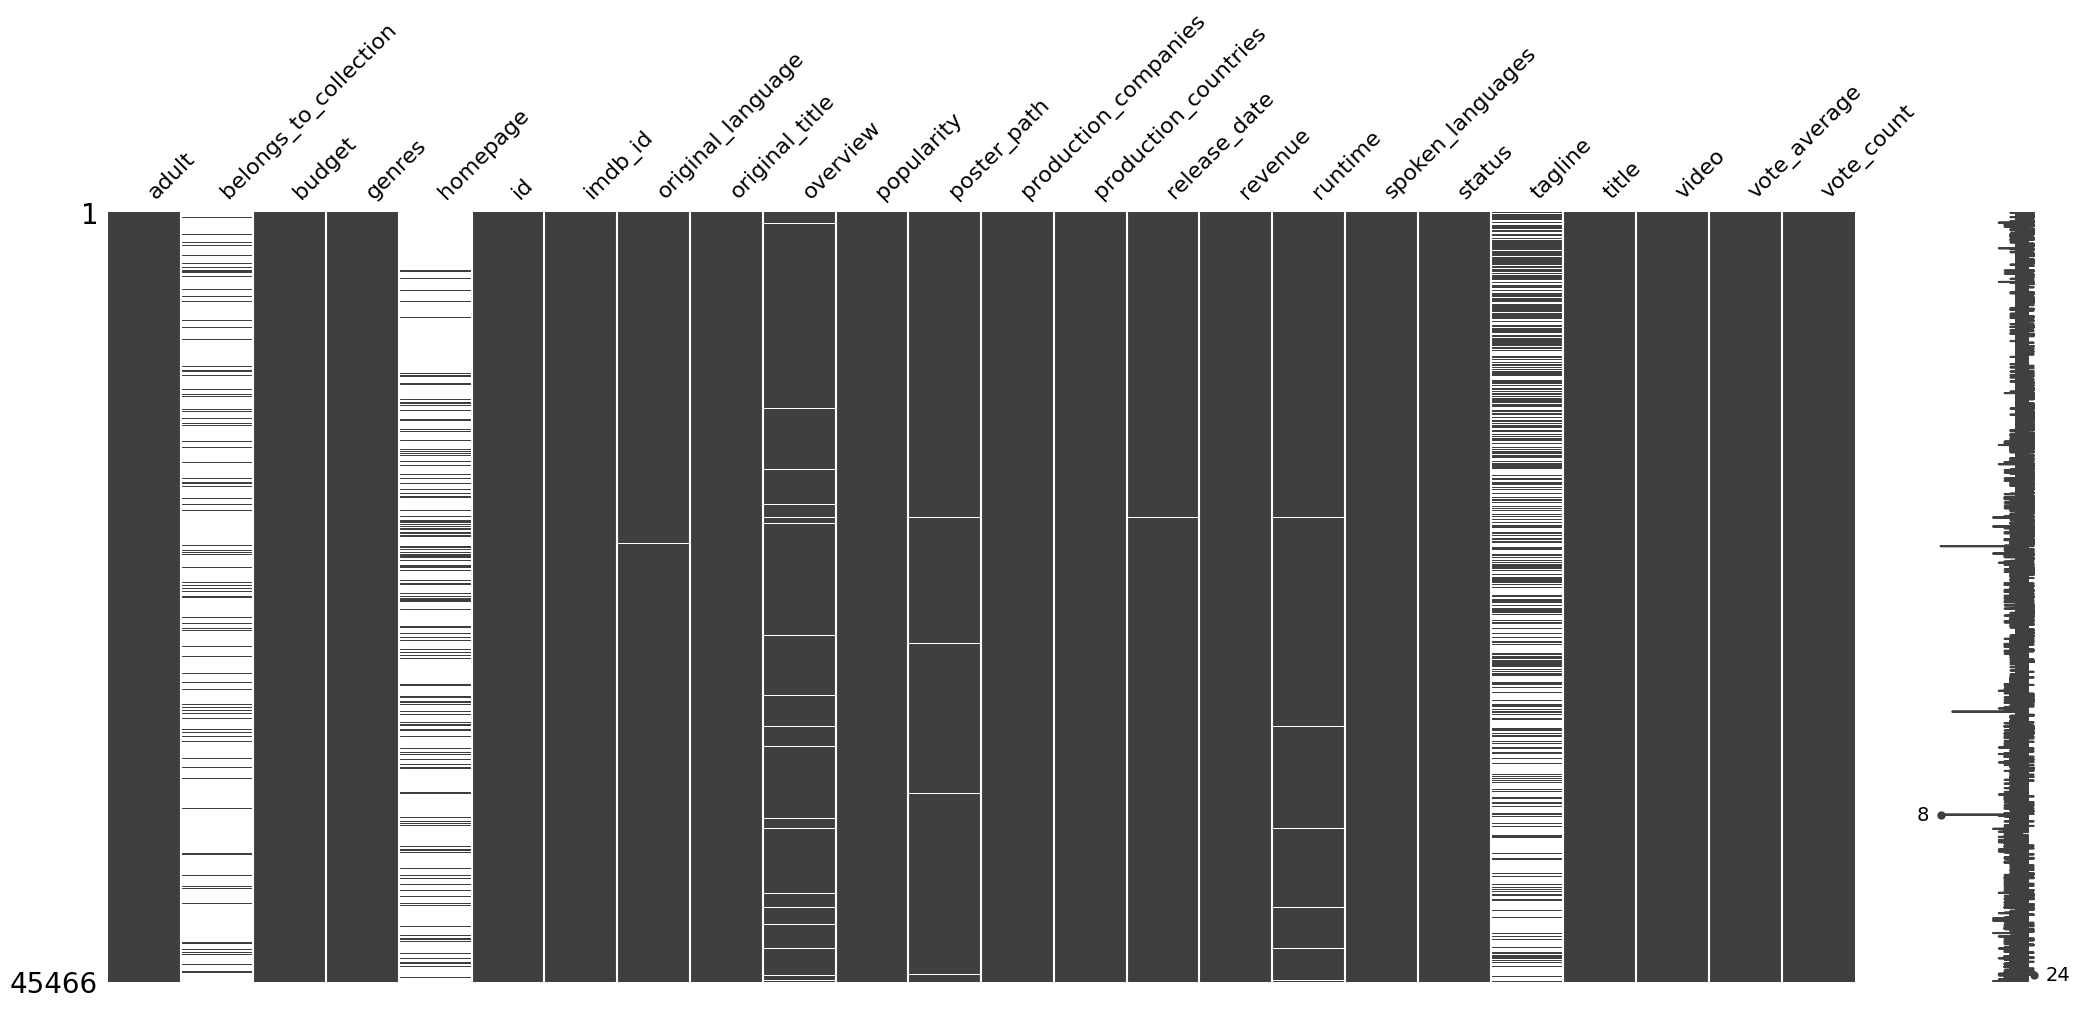

In [139]:
# Représentation des valeurs manquantes grace a la matrice du package misingno

msno.matrix(df)
plt.show()

In [140]:
df.iloc[0:,5:].head()

,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [141]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [142]:
# Identifier les colonnes de type texte (object/string)
text_columns = [ 'title', 
          'overview',
       'tagline']

print("Colonnes enregistrées:"+ str(text_columns))

Colonnes enregistrées:['title', 'overview', 'tagline']


In [143]:
df.select_dtypes(include='object')

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,video
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]

In [144]:
# Mapping des types des booléens
df["adult"] = df["adult"].map({"True": 1, "False": 0}) # 1 pour Adulte et 0 pour enfant 

In [145]:
# visualisaiton des différentes variable 
df["adult"].isna().sum()


np.int64(3)

In [146]:
# Evaluation du nombre de la variable
df["video"].value_counts()

video
False    45367
True        93
Name: count, dtype: int64

In [147]:
df["video"] = df["video"].map({True: 1, False: 0}) # 1 pour oui et 0 pour non

In [148]:
#  Conversion du type de la colone video
df["video"].astype("Int64")

0        0
1        0
2        0
3        0
4        0
        ..
45461    0
45462    0
45463    0
45464    0
45465    0
Name: video, Length: 45466, dtype: Int64

In [149]:
df["video"].value_counts() # Nombre de valeurs 0 et 1 de la colonne video 

video
0.0    45367
1.0       93
Name: count, dtype: int64

In [150]:
# Visualisaiton des colonnes video et adult du dataframe df 
df[["video", "adult"]].head()

,video,adult
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [151]:
df.select_dtypes(include=[ "int", "float"]) # Visualisation des variables représenté comme des entiers ou des décimaux 

,adult,revenue,runtime,video,vote_average,vote_count
0,0.0,373554033.0,81.0,0.0,7.7,5415.0
1,0.0,262797249.0,104.0,0.0,6.9,2413.0
2,0.0,0.0,101.0,0.0,6.5,92.0
3,0.0,81452156.0,127.0,0.0,6.1,34.0
4,0.0,76578911.0,106.0,0.0,5.7,173.0
...,...,...,...,...,...,...
45461,0.0,0.0,90.0,0.0,4.0,1.0
45462,0.0,0.0,360.0,0.0,9.0,3.0
45463,0.0,0.0,90.0,0.0,3.8,6.0
45464,0.0,0.0,87.0,0.0,0.0,0.0


In [152]:
df.head(5)
df = df.drop(columns=["id", "imdb_id"])

In [153]:
# Suppression de la colonne homepage qui a trop de valeurs manquantes
df = df.drop(columns=['homepage'])


In [154]:
# Nombre les valeurs uniques dans la colonne status
df["status"].value_counts()

status
Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: count, dtype: int64

In [155]:
# Nombre les valeurs uniques dans la colonne original_language
df["original_language"].value_counts()

original_language
en      32269
fr       2438
it       1529
ja       1350
de       1080
        ...  
sm          1
82.0        1
hy          1
lb          1
si          1
Name: count, Length: 92, dtype: int64

In [156]:
# Conversion de certaines colonnes en types numériques
pd.to_numeric(df["budget"], errors='coerce')
pd.to_numeric(df["vote_count"], errors='coerce')
pd.to_numeric(df["vote_average"], errors='coerce')


0        7.7
1        6.9
2        6.5
3        6.1
4        5.7
        ... 
45461    4.0
45462    9.0
45463    3.8
45464    0.0
45465    0.0
Name: vote_average, Length: 45466, dtype: float64

In [157]:
# Identification des données de type integer ou float
int_float_columns = df.select_dtypes(include=['int64', 'float64', 'boolean']).columns.tolist()
df[int_float_columns].head()

,adult,revenue,runtime,video,vote_average,vote_count
0,0.0,373554033.0,81.0,0.0,7.7,5415.0
1,0.0,262797249.0,104.0,0.0,6.9,2413.0
2,0.0,0.0,101.0,0.0,6.5,92.0
3,0.0,81452156.0,127.0,0.0,6.1,34.0
4,0.0,76578911.0,106.0,0.0,5.7,173.0


In [158]:
# Pourcentage de valeurs manquantes dans chaque colonne
missing_percentage = df[int_float_columns].isnull().mean() * 100
print(missing_percentage)

adult           0.006598
revenue         0.013197
runtime         0.578454
video           0.013197
vote_average    0.013197
vote_count      0.013197
dtype: float64


In [159]:
# Suppression de la colonne runtime qui a trop de valeurs manquantes
df = df.drop(columns=['runtime'])
int_float_columns.remove('runtime')

In [160]:
# Suppression des lignes avec des valeurs manquantes pour les colonnes textuelles
df[text_columns]= df[text_columns].fillna('')

### 1.3 Mini EDA (Exploratory Data Analysis)  



In [161]:
# Description primaire des variables quantitatives 
df.describe()

,adult,revenue,video,vote_average,vote_count
count,45463.000000,4.546000e+04,45460.000000,45460.000000,45460.000000
mean,0.000198,1.120935e+07,0.002046,5.618207,109.897338
std,0.014069,6.433225e+07,0.045184,1.924216,491.310374
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,5.000000,3.000000
50%,0.000000,0.000000e+00,0.000000,6.000000,10.000000
75%,0.000000,0.000000e+00,0.000000,6.800000,34.000000
max,1.000000,2.787965e+09,1.000000,10.000000,14075.000000


In [162]:


# Colonnes binaires (0/1)
binary_cols = [a for a in int_float_columns if df[a].dropna().nunique() <= 2]

# Colonnes continues
cont_cols = [c for c in int_float_columns if c not in binary_cols]

print("Binaires :", binary_cols)
print("Continues :", cont_cols)

Binaires : ['adult', 'video']
Continues : ['revenue', 'vote_average', 'vote_count']


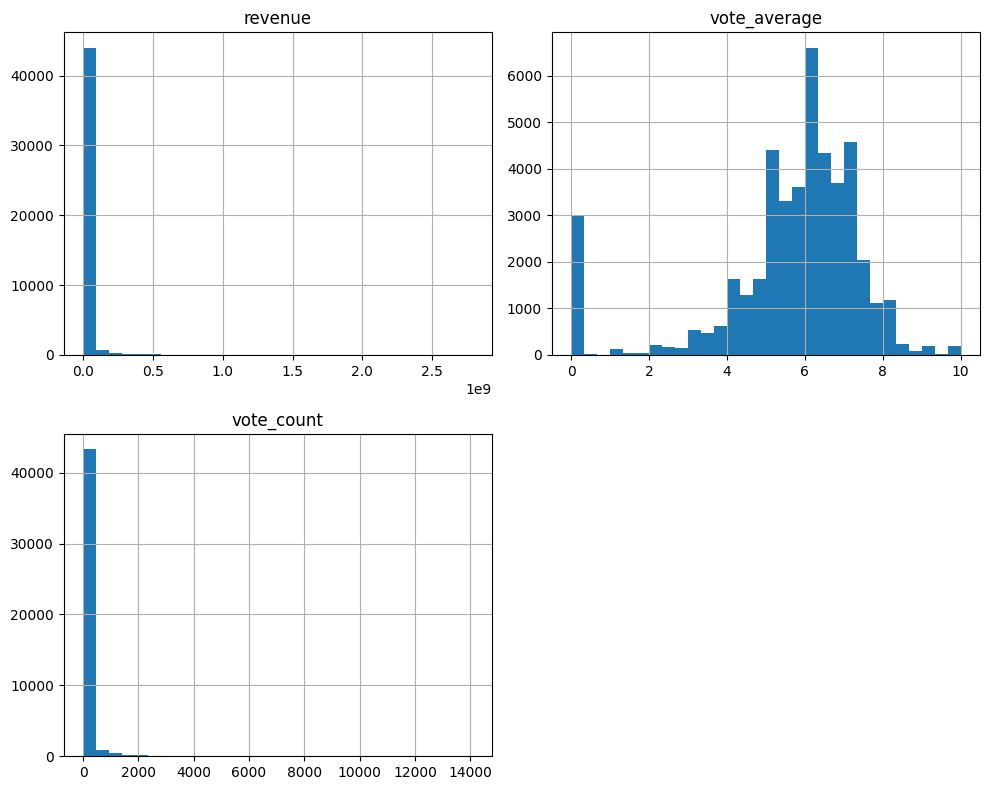

In [163]:
# Histogramme des variables numériques 
df[cont_cols].hist(
    bins=30,
    figsize=(10, 8),
)
plt.tight_layout()
plt.show()


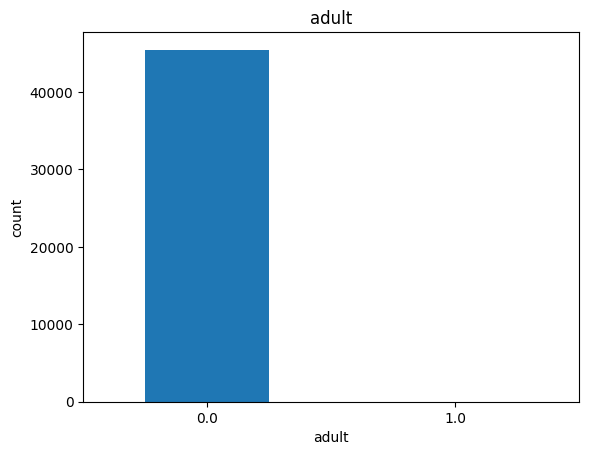

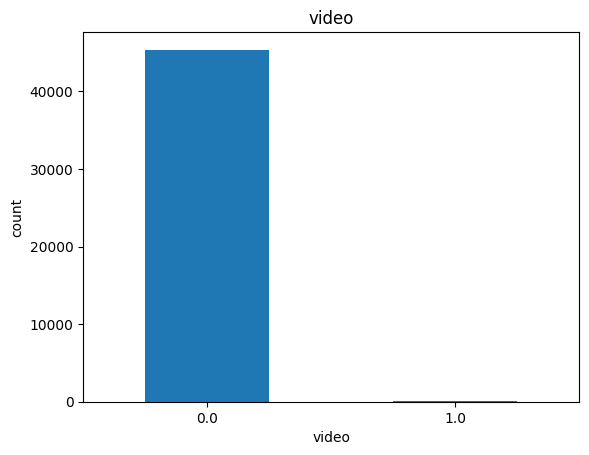

In [164]:
# Barplot des variables binaires 

for col in binary_cols:
    df[col].value_counts().sort_index().plot(
        kind="bar",
        rot=0,
        title=col
    )
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()


<Axes: >

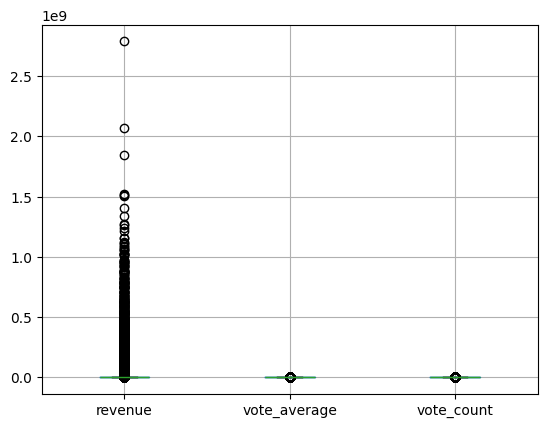

In [165]:
df[cont_cols].boxplot()

Pour homogénéiser les variables, nous allons mettre le revenue sous sa forme logarithmique

In [166]:
df["ln_revenue"] = np.log1p(df["revenue"])
df["ln_revenue"].replace(-np.inf, np.nan, inplace=True)

C:\Users\roumb\AppData\Local\Temp\ipykernel_8552\2796597055.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ln_revenue"].replace(-np.inf, np.nan, inplace=True)


In [167]:
df["ln_revenue"]

0        19.738573
1        19.386893
2         0.000000
3        18.215526
4        18.153832
           ...    
45461     0.000000
45462     0.000000
45463     0.000000
45464     0.000000
45465     0.000000
Name: ln_revenue, Length: 45466, dtype: float64

In [168]:
cont_cols = ['ln_revenue', 'vote_average', 'vote_count']

In [169]:
df['ln_revenue'].isna().mean()*100

np.float64(0.013196674438041614)

In [170]:
df["ln_vote_count"] = np.log1p(df["vote_count"])
df["ln_vote_count"].replace(-np.inf, np.nan, inplace=True)

C:\Users\roumb\AppData\Local\Temp\ipykernel_8552\1942209120.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ln_vote_count"].replace(-np.inf, np.nan, inplace=True)


In [171]:
cont_cols = ['ln_revenue', 'vote_average', 'ln_vote_count']

<Axes: >

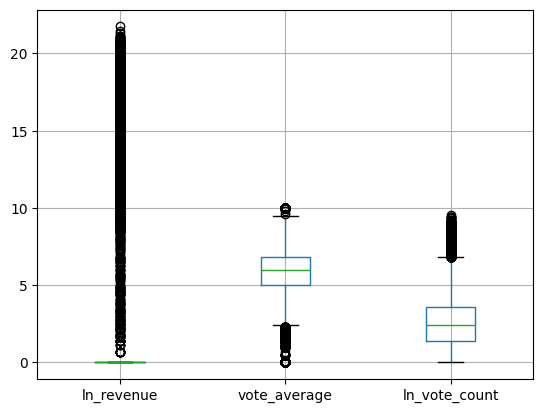

In [172]:
df[cont_cols].boxplot()


Text(0, 0.5, 'Moyenne des votes')

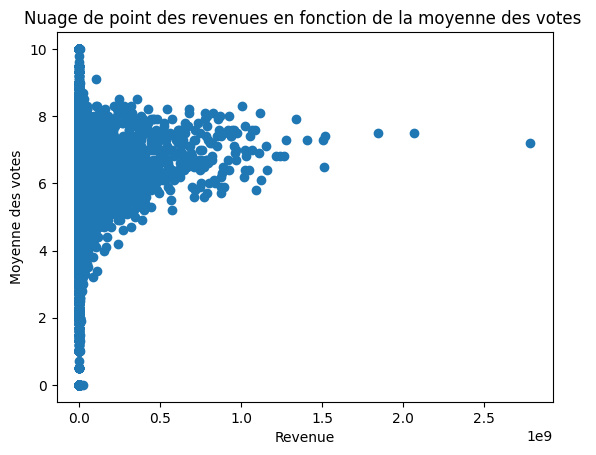

In [173]:
#Nuage de point des revenues en fonction de la moyenne des votes

plt.scatter (df["revenue"], df["vote_average"])
plt.title(label= "Nuage de point des revenues en fonction de la moyenne des votes ")
plt.xlabel("Revenue")
plt.ylabel("Moyenne des votes")

Text(0, 0.5, 'Nombre de votes ')

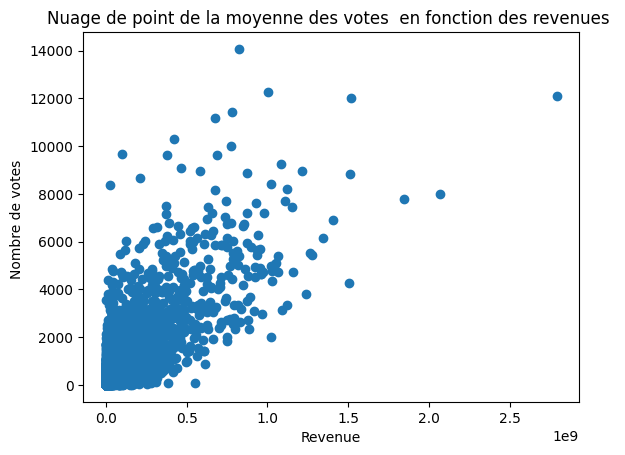

In [174]:
# Nuage de point de la moyenne des votes  en fonction des revenues 

plt.scatter (df["revenue"],df["vote_count"])
plt.title(label= "Nuage de point de la moyenne des votes  en fonction des revenues ")
plt.xlabel("Revenue")
plt.ylabel("Nombre de votes ")

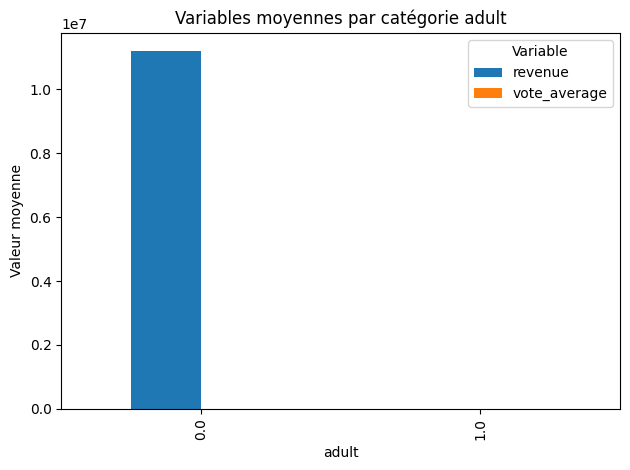

In [175]:
df_group = df.groupby('adult')[['revenue', 'vote_average']].mean()

df_group.plot(kind='bar')

plt.xlabel('adult')
plt.ylabel('Valeur moyenne')
plt.title('Variables moyennes par catégorie adult')
plt.legend(title='Variable')
plt.tight_layout()
plt.show()

In [176]:
df_group

,revenue,vote_average
adult,,
0.0,1.121157e+07,5.618543
1.0,0.000000e+00,3.922222


In [177]:
# Calcul de la moyenne des revenue en fonction de la diffusion des vidéos  

df_group1= df.groupby("video")['revenue'].mean()
df_group1 = pd.DataFrame(df_group1)
df_group1

,revenue
video,
0.0,1.123233e+07
1.0,0.000000e+00


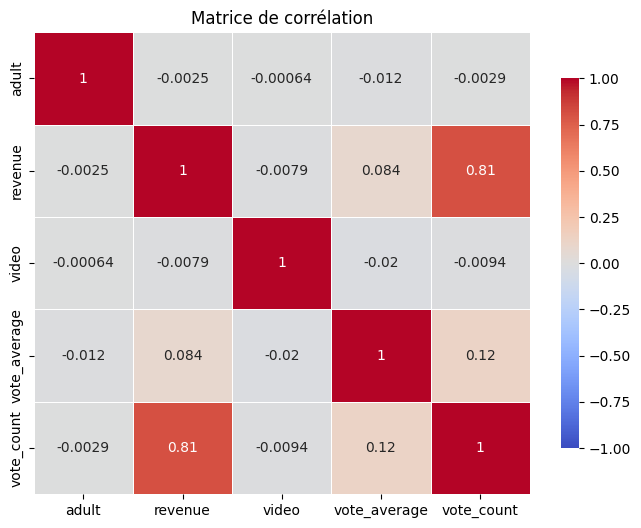

In [178]:
# Matrice de corrélation 

plt.figure(figsize=(8, 6))
sns.heatmap(df[int_float_columns].corr(), annot=True, cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1, cbar_kws={"shrink": 0.8})
plt.title("Matrice de corrélation")
plt.show()


Sur cette matrice de corrélation , nous pouvons observer qu'il y a beaucoup de variables très peu corrélé entre eux.
les variables adult et video sont quasiment **décorrélées de tout** (coefficients proches de 0 partout). Ça veut dire qu’au niveau linéaire, elles n’expliquent ni le revenu, ni les votes, ni la note moyenne. Elles pourront éventuellement capter des effets marginaux dans le modèle, mais on ne s’attend pas à ce qu’elles aient un poids énorme.

Par ailleurs, il semble il n'y avoir que la **corrélation revenue–vote_count ≈ 0.81** qui se démarque.  
Dit autrement : plus un film cumule de votes, plus il génère de revenus. Ce n’est pas très surprenant, mais ça confirme bien que vote_count joue le rôle de proxy de **popularité / exposition**. 

En outre, on voit aussi une petite corrélation positive entre vote_average et vote_count (~0.12), ce qui suggère que les films les plus notés ont tendance à avoir un peu plus de visibilité, mais l’effet reste faible.

In [ ]:
# Modele de régression linéaire avec statsmodels  ( juste avec les variables quantitatives sans les variables catégorielles ni booléennes)
modele = smf.ols('ln_revenue~vote_average+ln_vote_count', data=df).fit()
print(modele.summary())


                            OLS Regression Results                            
Dep. Variable:             ln_revenue   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                 1.700e+04
Date:                Sun, 30 Nov 2025   Prob (F-statistic):               0.00
Time:                        01:42:15   Log-Likelihood:            -1.3346e+05
No. Observations:               45460   AIC:                         2.669e+05
Df Residuals:                   45457   BIC:                         2.670e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2731      0.066    -19.167

Dans ce modèle, je regarde comment le **log du revenu** réagit en fonction de la note moyenne et du nombre de votes.  
En gros, j’estime :

$$
\ln(\text{revenue}_i)
= \beta_0 
+ \beta_1 \,\text{vote\_average}_i
+ \beta_2 \,\ln(\text{vote\_count}_i)
+ \varepsilon_i
$$

Avec mon estimation, j’obtiens à la louche :

- $\beta_1 \approx -0.47$ pour vote_average  
- $\beta_2 \approx 2.45$ pour ln_vote_count

---

Pour **$\beta_2$**, je suis en **log–log** (log sur la variable dépendante et log sur vote_count).  
Du coup, $\beta_2$ se lit comme une **élasticité** :

$$
\frac{\partial \ln(\text{revenue})}{\partial \ln(\text{vote\_count})}
= \beta_2
$$

Autrement dit :

$$
\%\Delta \text{revenue} \approx \beta_2 \times \%\Delta \text{vote\_count}
$$

Donc avec $\beta_2 \approx 2.45$ :

> si le nombre de votes augmente de **1 %**, le revenu moyen du film augmente d’environ **2.45 %**, toutes choses égales par ailleurs.  

Ça confirme que vote_count est un moteur très fort du box office.

---

Pour **$\beta_1$**, je suis en **log–niveau** (log sur revenue, niveau sur vote_average).  
Là, $\beta_1$ se lit comme une **semi-élasticité** :

$$
\frac{\partial \ln(\text{revenue})}{\partial \text{vote\_average}}
= \beta_1
$$

Si la note moyenne augmente de **1 point**, on a approximativement :

$$
\Delta \ln(\text{revenue}) \approx \beta_1
$$

Pour convertir ça en pourcentage de revenu, je peux utiliser la formule exacte :

$$
\%\Delta \text{revenue}
= \big(e^{\beta_1} - 1\big)\times 100
$$

Avec $\beta_1 \approx -0.468$ :

$$
e^{-0.468} \approx 0.63
\quad\Rightarrow\quad
\%\Delta \text{revenue}
\approx (0.63 - 1)\times 100 \approx -37\%
$$

Dit autrement :

> à popularité donnée (même ln_vote_count), **gagner 1 point de note moyenne** est associé à une **baisse d’environ 37 % du revenu**.  

C’est contre-intuitif au premier abord, mais ça colle bien avec l’idée que les films “très bien notés” ne sont pas forcément les plus financé : les gros cartons grand public peuvent avoir une note moyenne plus modeste, tout en écrasant le box office.


## 2. MODELE DE PREDICTION DES VARIABLES QUANTITATIVES 

### 2.1 Construction du dataset ML  


En apprentissage supervisé, on part d’un jeu de données :

$$
\mathcal{D} = \{(x_i, y_i)\}_{i=1}^n
$$

- $x_i \in \mathbb{R}^p$ : vecteur de caractéristiques (features) de l’observation $i$  
- $y_i$ : la variable cible (label) associée  

L’idée, c’est d’apprendre une fonction $f_\theta(\cdot)$ (paramétrée par $\theta$) qui approxime la vraie relation inconnue entre $x$ et $y$ :

$$
y \approx f^\star(x) \quad \text{(relation vraie mais inconnue)}
$$

En pratique, on apprend une **approximation** :

$$
\hat{y}_i = f_\theta(x_i)
$$

où les paramètres $\theta$ sont appris à partir des données.

Pour apprendre un modèle, on a besoin :

1. D’une **fonction de perte** $L(y, f_\theta(x))$ qui mesure l’erreur entre la valeur réelle et la prédiction.  
   En régression, une perte classique est l’**erreur quadratique** :

   $$
   L(y_i, f_\theta(x_i)) = \big(y_i - f_\theta(x_i)\big)^2
   $$

2. Du **risque empirique**, c’est-à-dire la perte moyenne sur les données d’entraînement :

   $$
   R_{\text{emp}}(\theta) = \frac{1}{n} \sum_{i=1}^n L\big(y_i, f_\theta(x_i)\big)
   $$

L’apprentissage consiste alors à trouver les paramètres $\hat{\theta}$ qui minimisent ce risque empirique :

$$
\hat{\theta} = \arg\min_{\theta} R_{\text{emp}}(\theta)
$$

En un mot : je cherche le modèle qui, en moyenne, se trompe le moins possible sur les données d’entraînement.

Un bon modèle ne doit pas seulement être bon sur les données d’entraînement, mais aussi sur de **nouvelles données** :

- **Underfitting** : modèle trop simple, il ne capture pas la structure des données.  
- **Overfitting** : modèle trop complexe, il “mémorise” le bruit et se plante sur des données nouvelles.

En théorie, on s’intéresse au **risque attendu** :

$$
R(\theta) = \mathbb{E}_{(X,Y)} \big[ L(Y, f_\theta(X)) \big]
$$

Comme on ne connaît pas la vraie distribution de $(X, Y)$, on l’approxime via :

- un **jeu d’entraînement** (pour apprendre),  
- un **jeu de test** (pour évaluer la généralisation),  
- et de la **validation croisée** (*cross-validation*) pour stabiliser l’évaluation.

---

*Formulation de mon problème (films & ln_revenue)* 

Dans cette partie, je formule mon problème comme un apprentissage supervisé de type **régression**.

Chaque film $i$ est décrit par un vecteur de caractéristiques $x_i$ :

- variables quantitatives : vote_average, vote_count, ln_vote_count, etc.  
- variables binaires : adult, video, …

Ma variable cible est le **logarithme du revenu au box office**, ce qui permet de stabiliser la variance et de limiter l’impact des valeurs extrêmes :

$$
y_i = \ln(\text{revenue}_i)
$$

L’objectif est d’apprendre une fonction $\hat{f}$ telle que :

$$
y_i \approx \hat{f}(x_i)
$$

en minimisant l’erreur quadratique moyenne (MSE) sur l’échantillon d’entraînement :

$$
\hat{f} = \arg\min_f \frac{1}{n_{\text{train}}} \sum_{i \in \text{train}} \big( y_i - f(x_i) \big)^2
$$

Concrètement, je :

- ne prends ici que des **variables quantitatives et binaires** (pas encore le texte),
- sépare les données en **jeu d’entraînement** et **jeu de test** (80 % / 20 %),
- commence par une **régression linéaire** comme modèle de base,
- puis j’entraîne une **Random Forest Regressor** pour capturer des relations non linéaires.

---

La **Random Forest** est un modèle d’ensemble basé sur des arbres de décision.  
L’idée est de construire $T$ arbres $f_1, f_2, \dots, f_T$ sur des échantillons bootstrapés, en testant à chaque split un sous-ensemble aléatoire de variables.

En régression, la prédiction finale pour un film décrit par $x$ est donnée par la moyenne des arbres :

$$
\hat{f}(x) = \frac{1}{T} \sum_{t=1}^{T} f_t(x)
$$

Cette approche :

- réduit la **variance** du modèle,  
- capture des **relations non linéaires** entre les features et ln_revenue,  
- est généralement plus robuste qu’un seul arbre ou qu’un simple modèle linéaire.

---

Pour évaluer la qualité de mes modèles, j’utilise plusieurs métriques complémentaires :

- **MSE (Mean Squared Error)** – erreur quadratique moyenne :

  $$
  \text{MSE} = \frac{1}{n_{\text{test}}} \sum_{i \in \text{test}} \big( y_i - \hat{f}(x_i) \big)^2
  $$

- **RMSE (Root Mean Squared Error)** – racine de la MSE, interprétable dans l’unité de $y$ :

  $$
  \text{RMSE} = \sqrt{\text{MSE}}
  $$

- **MAE (Mean Absolute Error)** – moyenne des erreurs absolues :

  $$
  \text{MAE} = \frac{1}{n_{\text{test}}} \sum_{i \in \text{test}} \big| y_i - \hat{f}(x_i) \big|
  $$

- **$R^2$ (coefficient de détermination)** – part de variance expliquée par le modèle :

  $$
  R^2 = 1 - \frac{\sum_{i \in \text{test}} \big( y_i - \hat{f}(x_i) \big)^2}{\sum_{i \in \text{test}} \big( y_i - \bar{y} \big)^2}
  $$

où $\bar{y}$ est la moyenne des $y_i$ sur le jeu de test.

En plus de la simple séparation train/test, j’utilise une **validation croisée à 5 folds** sur la Random Forest pour vérifier que les performances sont **stables** d’un sous-échantillon à l’autre et que je ne suis pas en plein overfitting sur un split chanceux.


In [179]:
df[int_float_columns].head(2)

,adult,revenue,video,vote_average,vote_count
0,0.0,373554033.0,0.0,7.7,5415.0
1,0.0,262797249.0,0.0,6.9,2413.0


In [180]:
df[binary_cols].head(2)

,adult,video
0,0.0,0.0
1,0.0,0.0


In [181]:
df1 = df[int_float_columns]

df1.head()

,adult,revenue,video,vote_average,vote_count
0,0.0,373554033.0,0.0,7.7,5415.0
1,0.0,262797249.0,0.0,6.9,2413.0
2,0.0,0.0,0.0,6.5,92.0
3,0.0,81452156.0,0.0,6.1,34.0
4,0.0,76578911.0,0.0,5.7,173.0


In [182]:
df1["ln_revenue"] = np.log1p(df1["revenue"])

C:\Users\roumb\AppData\Local\Temp\ipykernel_8552\2069358522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["ln_revenue"] = np.log1p(df1["revenue"])


In [183]:
df1["ln_vote_count"] = np.log1p(df1["vote_count"])

C:\Users\roumb\AppData\Local\Temp\ipykernel_8552\1750366909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["ln_vote_count"] = np.log1p(df1["vote_count"])


In [184]:
df1.head(2)

,adult,revenue,video,vote_average,vote_count,ln_revenue,ln_vote_count
0,0.0,373554033.0,0.0,7.7,5415.0,19.738573,8.597113
1,0.0,262797249.0,0.0,6.9,2413.0,19.386893,7.789040


In [185]:
# Utilisation des variables numériques + certaines variables textuelle non utilisé dans le Word2Vec
df1.columns


Index(['adult', 'revenue', 'video', 'vote_average', 'vote_count', 'ln_revenue',
       'ln_vote_count'],
      dtype='object')

In [186]:
# Remplacement des NaN de ln_revenue par la moyenne
df1["ln_revenue"] = df1["ln_revenue"].fillna(df1["ln_revenue"].mean())


C:\Users\roumb\AppData\Local\Temp\ipykernel_8552\4015441926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["ln_revenue"] = df1["ln_revenue"].fillna(df1["ln_revenue"].mean())


In [187]:
# On part d'un DataFrame df
# la variable cible
y = df1["ln_revenue"]          # variable à prédire (0/1)
x = df1.drop(columns=["ln_revenue", "revenue"])   # toutes les autres colonnes en features

In [188]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   adult          45463 non-null  float64
 1   video          45460 non-null  float64
 2   vote_average   45460 non-null  float64
 3   vote_count     45460 non-null  float64
 4   ln_vote_count  45460 non-null  float64
dtypes: float64(5)
memory usage: 1.7 MB


In [189]:
# Remplacement des valeurs manquantes de y par la moyenne
y  = y.fillna(y.mean())

In [190]:
#  Meme chose pour x 

x["adult"] = x["adult"].fillna(x["adult"].mean())
x["video"] = x["video"].fillna(x["video"].mean())
x["ln_vote_count"] = x["ln_vote_count"].fillna(x["ln_vote_count"].mean())
x["vote_average"] = x["vote_average"].fillna(x["vote_average"].mean())
x["vote_count"] = x["vote_count"].fillna(x["vote_count"].mean())

In [191]:
x.isna().sum()

adult            0
video            0
vote_average     0
vote_count       0
ln_vote_count    0
dtype: int64

In [192]:
x.columns

Index(['adult', 'video', 'vote_average', 'vote_count', 'ln_vote_count'], dtype='object')

In [193]:
#  Train / test split SANS stratify
X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,      # 20% test
    random_state=42
)

In [194]:
# Taille des jeux d'entrainements et de test de la variable x
print("Taille de x_train :", X_train.shape)
print("Taille de x_test :", X_test.shape)

Taille de x_train : (36372, 5)
Taille de x_test : (9094, 5)



### 2.2 Baseline “simple”  

In [195]:
# Réalisation du modele linéaire avec la variable d'entrainement 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [196]:
# Création de la prédiction de y ( ln revenue)
y_pred = lin_reg.predict(X_test)


In [197]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

In [198]:

print("=== Régréssion linéaire ===")
print("RMSE :", rmse)
print("MAE  :", mae)
print("R²   :", r2)

=== Régréssion linéaire ===
RMSE : 4.570384706495498
MAE  : 3.2374454142051206
R²   : 0.43666654389275494


### 2.3 Random Forest 

In [199]:
#  Création d'un modèle Random Forest
#     - n_estimators : nombre d'arbres dans la forêt
#     - max_depth    : profondeur max des arbres (None -> laisse pousser)
#     - n_jobs       : -1 -> utilise tous les coeurs CPU disponibles
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)



In [200]:
# Entraînement du Random Forest
rf.fit(X_train, y_train)




,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [201]:
# Prédictions sur le test
y_pred_rf = rf.predict(X_test)


In [202]:

# Même logique de métriques que pour la régression linéaire
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf  = mean_absolute_error(y_test, y_pred_rf)
r2_rf   = r2_score(y_test, y_pred_rf)

print("=== Régression RandomForest ===")
print(f"RMSE : {rmse_rf:.4f}")
print(f"MAE  : {mae_rf:.4f}")
print(f"R²   : {r2_rf:.4f}")

=== Régression RandomForest ===
RMSE : 4.6573
MAE  : 2.3182
R²   : 0.4150


### 2.4 Validation croisée & robustesse 

In [203]:
# On crée un modèle Random Forest "de base"
#    - Ici on ne le fit pas encore : on donne juste sa configuration à sklearn.
rf_cv = RandomForestRegressor(
    n_estimators=300,   # nombre d'arbres dans la forêt
    random_state=42,    # pour rendre les résultats reproductibles
    n_jobs=-1           # utilise tous les coeurs CPU disponibles
)



In [204]:
# Validation croisée (cross-validation) avec 5 folds
#    - X : toutes les features (sur l'ensemble du dataset, pas seulement le train)
#    - y : la cible ln_revenue
#    - cv=5 : on découpe les données en 5 "sous-échantillons".
#             À chaque itération : 4 folds pour entraîner, 1 fold pour tester.
#    - scoring="neg_root_mean_squared_error" :
#           sklearn retourne des scores à maximiser,
#           donc pour les erreurs (RMSE, MSE, MAE), il met un signe négatif.
scores = cross_val_score(
    rf_cv,
    x, y,
    cv=5,
    scoring="neg_root_mean_squared_error"
)


In [205]:

# Les scores retournés sont des RMSE négatives.
#    -> on remet le signe dans le bon sens en multipliant par -1
rmse_scores = -scores   # on obtient une liste de 5 RMSE (une par fold)


In [206]:
# On calcule :
#    - la RMSE moyenne sur les 5 folds (performance "globale" du modèle)
#    - l'écart-type des RMSE (stabilité du modèle selon le découpage des données)
print("=== RandomForest:  Validation croisée (5 folds) ===")
print("RMSE moyen :", rmse_scores.mean())
print("RMSE std   :", rmse_scores.std())

=== RandomForest:  Validation croisée (5 folds) ===
RMSE moyen : 4.431519203819792
RMSE std   : 1.3206399408415594


Pour vérifier que la Random Forest ne fait pas juste un “coup de chance” sur un seul découpage train / test, je passe par une **validation croisée à 5 folds**.  

Sur ces 5 découpages, j’obtiens :

- un **RMSE moyen** d’environ **4.43**  
- un **écart-type du RMSE** d’environ **1.32**

Comme je travaille toujours sur la cible en log, un RMSE ≈ 4.43 reste élevé, mais il est **un peu meilleur** que le RMSE obtenu sur le split simple train / test (≈ 4.66). Ça veut dire que, en moyenne, la forêt se comporte légèrement mieux quand on la regarde sur plusieurs découpages de données, ce qui est plutôt rassurant : le modèle ne s’effondre pas dès qu’on change le jeu de test.

Par contre, l’écart-type de **1.32** montre que les performances **varient pas mal d’un fold à l’autre**. En gros, selon la façon dont on découpe les données, le modèle peut être un peu meilleur ou un peu pire, ce qui reflète bien le côté très hétérogène des revenus de films (et la présence de cas extrêmes qui tombent parfois dans le train, parfois dans le test).

En résumé, cette validation croisée me dit deux choses :  
1) la Random Forest a un niveau de performance global assez cohérent avec ce que j’avais observé sur le split 80/20 (donc pas de sur-apprentissage massif sur un seul split),  
2) mais le modèle reste **instable sur certains découpages**, ce qui montre qu’il est sensible à la façon dont les films sont répartis entre train et test.  

C’est exactement pour ça que la suite du projet doit aller chercher d’autres sources d’information (notamment le texte, avec Word2Vec) pour essayer de mieux expliquer la variabilité des revenus.



In [207]:
resultats = pd.DataFrame({
    "Model": ["LinearRegression", "RandomForest"],
    "RMSE":  [rmse, rmse_rf],
    "MAE":   [mae,  mae_rf],
    "R2":    [r2,   r2_rf]
})

# On affiche le tableau pour voir qui s'en sort le mieux
resultats 

,Model,RMSE,MAE,R2
0,LinearRegression,4.570385,3.237445,0.436667
1,RandomForest,4.657347,2.318216,0.415025


Sur ce premier bloc de modèles, la régression linéaire joue vraiment le rôle de **baseline**.  
Elle arrive à expliquer environ **44 % de la variance** de ln_revenue, ce qui montre qu’il y a bien un **signal exploitable** dans les variables liées aux votes et aux indicateurs binaires. En même temps, un peu plus de la moitié de la variabilité des revenus reste complètement non expliquée, ce qui est cohérent avec la réalité du marché des films : gros blockbusters, budget marketing, effet franchise, casting, etc. que je ne modélise pas ici.

Ensuite, quand je passe à la **Random Forest Regressor**, je ne vois pas de vraie “claque” en termes de $R^2$ : le score descend légèrement (autour de 0,42). En revanche, la forêt améliore clairement la Moyenne des erreurs absolue( **MAE** ) (on passe d’environ 3,24 à 2,32 en log), ce qui veut dire qu’elle est **plus précise pour la majorité des films**. Autrement dit, sur les cas “standards”, la RF colle mieux au log-revenu que la régression linéaire.

Par contre, cette amélioration moyenne a un prix : la racine des erreurs quadratique moyenne **(RMSE) augmente légèrement**. Cela suggère que, même si la Random Forest fait mieux en général, elle produit aussi **quelques grosses erreurs sur des cas extrêmes** (souvent les films très atypiques ou les énormes succès au box office), ce qui tire le RMSE vers le haut.

Au final, la **régression linéaire** reste une baseline propre, simple à interpréter et cohérente avec les variables utilisées, tandis que la **Random Forest** apporte une meilleure précision moyenne (MAE plus faible) mais au prix d’un $R^2$ un peu inférieur et de quelques prédictions vraiment mauvaises sur certains films. À ce stade du projet, je garde donc la linéaire comme **référence stable et interprétable**, et je considère la Random Forest comme un **modèle plus flexible**, qui aura probablement plus de choses à dire quand j’intégrerai des features plus riches, notamment celles issues du texte (Word2Vec, embeddings, etc.).


## 3. APPRENTISSAGE DES EMBEDDINGS Word2Vec

### 3.1. Rappel rapide : comment fonctionne Word2Vec dans mon projet

Dans cette partie, l’idée est de passer des overview (descriptions des films) à une **représentation vectorielle des mots**.  
Concrètement, chaque mot du vocabulaire va être associé à un vecteur de dimension $d$ (par exemple 100), appris automatiquement à partir des co-occurrences dans le corpus.

Après nettoyage et tokenisation, chaque film $j$ est représenté par une séquence de mots :

$$
\text{overview}_j = (w_{j1}, w_{j2}, \dots, w_{jT_j})
$$

Dans mon code, j’utilise le modèle **skip-gram** de Word2Vec (sg = 1 dans gensim).  
L’idée, c’est qu’à partir d’un mot central $w_t$, le modèle apprend à **prédire les mots de contexte** $w_c$ dans une fenêtre de taille window autour de lui.

Mathématiquement, pour chaque paire (mot central, mot de contexte) $(w_t, w_c)$, le modèle associe :

- un vecteur d’entrée $v_{w_t} \in \mathbb{R}^d$  
- un vecteur de sortie $v'_{w_c} \in \mathbb{R}^d$

et définit la probabilité de voir le mot de contexte $w_c$ autour de $w_t$ par :

$$
p(w_c \mid w_t) 
= \frac{\exp\big( {v'_{w_c}}^{\top} v_{w_t} \big)}
       {\sum_{w \in V} \exp\big( {v'_w}^{\top} v_{w_t} \big)}
$$

où $V$ est le vocabulaire.

L’entraînement consiste à **maximiser** la probabilité des contextes réellement observés, donc à résoudre :

$$
\max_{\{v_w, v'_w\}} 
\sum_{\text{paires } (w_t, w_c)}
\log p(w_c \mid w_t)
$$

(en pratique avec des variantes comme le *negative sampling*, gérées automatiquement par gensim).

Au final, ce qui m’intéresse, ce sont les vecteurs **d’entrée** $v_w$ :

$$
w \longmapsto v_w \in \mathbb{R}^d
$$

Deux mots qui apparaissent souvent dans des contextes similaires auront des vecteurs proches, ce qu’on peut mesurer par exemple avec la **similarité cosinus** :

$$
\text{sim}(w_i, w_j) 
= \frac{v_{w_i}^{\top} v_{w_j}}
       {\|v_{w_i}\| \, \|v_{w_j}\|}
$$


Pour résumer ce que je fais dans cette partie, on peut représenter le pipeline ainsi :

text
Descriptions de films (overview brutes)
          ↓  nettoyage (minuscules, ponctuation, stopwords...)
          ↓  tokenisation
séquences de mots
          ↓  entraînement Word2Vec (skip-gram, window, min_count, epochs)
matrice d'embeddings des mots (n_mots × d)
          ↓  (utilisée ensuite pour PCA, t-SNE, clustering, etc.)


### 3.1 Préparation du texte (overview)  

In [208]:
# Normalisation de texte
# Fonction de nettoyage du texte
def clean_text(text):
    # Convertir le texte en minuscules
    text = text.lower() 
    # Supprimer URLs
    text = re.sub(r'http\S+|www\S+', '', text) 
    # Supprimer ponctuation & caractères spéciaux
    text = re.sub(r'[^a-z\s]', '', text)
    # Supprimer espaces multiples
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [209]:
# Appliquer clean_text à chaque colonne texte
for col in text_columns:
    print(f"Nettoyage de la colonne : {col}")
    df[col] = df[col].astype(str).apply(clean_text)  # convertir en str au cas où

print("Nettoyage terminé !")
df[text_columns].head()

Nettoyage de la colonne : title
Nettoyage de la colonne : overview
Nettoyage de la colonne : tagline
Nettoyage terminé !


,title,overview,tagline
0,toy story,led by woody andys toys live happily in his ro...,
1,jumanji,when siblings judy and peter discover an encha...,roll the dice and unleash the excitement
2,grumpier old men,a family wedding reignites the ancient feud be...,still yelling still fighting still ready for love
3,waiting to exhale,cheated on mistreated and stepped on the women...,friends are the people who let you be yourself...
4,father of the bride part ii,just when george banks has recovered from his ...,just when his world is back to normal hes in f...


In [210]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'spoken_languages', 'status', 'tagline',
       'title', 'video', 'vote_average', 'vote_count', 'ln_revenue',
       'ln_vote_count'],
      dtype='object')

In [211]:
# Tokenization de la review AVEC suppression des stopwords
def tokenize_with_stopwords(text): # 
    tokens = gensim.utils.simple_preprocess(text)
    # Filtrer les stopwords et les mots trop courts
    return [token for token in tokens if token not in stop_words and len(token) > 2]

### 3.2 Construction du corpus  

In [212]:
# Appliquer clean_text à chaque colonne texte
for col in text_columns:
    print(f"Nettoyage de la colonne : {col}")
    df[col] = df[col].astype(str).apply(tokenize_with_stopwords)  # convertir en str au cas où

print("Nettoyage terminé !")
df[text_columns].head()

Nettoyage de la colonne : title
Nettoyage de la colonne : overview
Nettoyage de la colonne : tagline
Nettoyage terminé !


,title,overview,tagline
0,"[toy, story]","[led, woody, andys, toys, live, happily, room,...",[]
1,[jumanji],"[siblings, judy, peter, discover, enchanted, b...","[roll, dice, unleash, excitement]"
2,"[grumpier, old, men]","[family, wedding, reignites, ancient, feud, ne...","[still, yelling, still, fighting, still, ready..."
3,"[waiting, exhale]","[cheated, mistreated, stepped, women, holding,...","[friends, people, let, never, let, forget]"
4,"[father, bride, part]","[george, banks, recovered, daughters, wedding,...","[world, back, normal, hes, surprise, life]"


In [213]:
# Affichage de la 1ere ligne de la colonne  'overview'

print(df['overview'].iloc[0])

['led', 'woody', 'andys', 'toys', 'live', 'happily', 'room', 'andys', 'birthday', 'brings', 'buzz', 'lightyear', 'onto', 'scene', 'afraid', 'losing', 'place', 'andys', 'heart', 'woody', 'plots', 'buzz', 'circumstances', 'separate', 'buzz', 'woody', 'owner', 'duo', 'eventually', 'learns', 'put', 'aside', 'differences']


Etant donné que la phase modélisation est totalement rigide avec les différentes colonnes du data frame df , nous alllons juste fusionner les colonnes texte à vectoriser dans une colonne pour que tout puisse passer 

In [214]:
#  Aggrégation de toutes les colonnes utile au NLP dans une seule colonne 'wvtext'
df['wvtext'] = df[text_columns].apply(lambda x: ' '.join([' '.join(map(str, x[col])) for col in text_columns]), axis=1)

In [215]:
df[[ 'title', 
          'overview',
       'tagline', 'wvtext']].head(2)

,title,overview,tagline,wvtext
0,"[toy, story]","[led, woody, andys, toys, live, happily, room,...",[],toy story led woody andys toys live happily ro...
1,[jumanji],"[siblings, judy, peter, discover, enchanted, b...","[roll, dice, unleash, excitement]",jumanji siblings judy peter discover enchanted...


In [216]:
#Verification de la fusion des colonnes
df['wvtext'][1]

'jumanji siblings judy peter discover enchanted board game opens door magical world unwittingly invite alan adult whos trapped inside game years living room alans hope freedom finish game proves risky three find running giant rhinoceroses evil monkeys terrifying creatures roll dice unleash excitement'

In [217]:
# Tockenisaiton de wvtext
df['wvtext'] = df['wvtext'].apply(gensim.utils.simple_preprocess)

In [218]:
print(df['wvtext'][1])

['jumanji', 'siblings', 'judy', 'peter', 'discover', 'enchanted', 'board', 'game', 'opens', 'door', 'magical', 'world', 'unwittingly', 'invite', 'alan', 'adult', 'whos', 'trapped', 'inside', 'game', 'years', 'living', 'room', 'alans', 'hope', 'freedom', 'finish', 'game', 'proves', 'risky', 'three', 'find', 'running', 'giant', 'rhinoceroses', 'evil', 'monkeys', 'terrifying', 'creatures', 'roll', 'dice', 'unleash', 'excitement']


In [219]:
wv1 = df['wvtext'].tolist()

In [220]:
# Affichage du nombre de phrases tokenisées et d'un exemple
print(f"Total de phrases tokenisées: {len(wv1)}")
print(f"Exemple: {wv1[1][:10]}")  # Affiche les 10 premiers tokens

Total de phrases tokenisées: 45466
Exemple: ['jumanji', 'siblings', 'judy', 'peter', 'discover', 'enchanted', 'board', 'game', 'opens', 'door']


### 3.3 Entraînement du modèle Word2Vec  



In [221]:
model = gensim.models.Word2Vec(
    window= 10, # taille de la fenetre( avant et apres le mot cible)
    min_count=5,# nombre minimum d'occurence pour qu'un mot soit pris en compte
    workers=4, # nombre de coeurs a utiliser en fonction du processeur (CPU)
    sg=1, # 1 pour skip-gram, 0 pour CBOW
    epochs = 10,
    seed =42
)

In [222]:
# Création du vocabulaire

model.build_vocab(wv1, progress_per=1000)# montre la progression toutes les 1000 phrases

In [223]:
model.epochs=10 # nombre d'itérations sur le corpus
# le corpus est constitué de phrases tokenisées

In [224]:
# Nombre de phrases dans le corpus
model.corpus_count

45466

In [225]:
model.train(wv1, total_examples=model.corpus_count, epochs=model.epochs) # entrainement du modele

(14349504, 15660690)

In [226]:
# Sauvegarde du modele 
model.save(r"C:\Users\roumb\OneDrive\Documents\01_Projet_GIT\Projet_ecole\Word2vec\DM\Notebooks\Data\processeced\word2vec.model")

In [227]:
print(wv1[1])

['jumanji', 'siblings', 'judy', 'peter', 'discover', 'enchanted', 'board', 'game', 'opens', 'door', 'magical', 'world', 'unwittingly', 'invite', 'alan', 'adult', 'whos', 'trapped', 'inside', 'game', 'years', 'living', 'room', 'alans', 'hope', 'freedom', 'finish', 'game', 'proves', 'risky', 'three', 'find', 'running', 'giant', 'rhinoceroses', 'evil', 'monkeys', 'terrifying', 'creatures', 'roll', 'dice', 'unleash', 'excitement']


### 3.4 Tests de similarité 

In [228]:
# Exemple de similarité entre les mots avec le mot "bad"

bad_similar = model.wv.most_similar("bad")
bad_similar =pd.DataFrame(bad_similar, columns=['Mot', 'Similarité'])
display(bad_similar)

,Mot,Similarité
0,good,0.768471
1,luck,0.655220
2,houseguests,0.613416
3,ass,0.609429
4,guys,0.580264
5,natured,0.557473
6,gut,0.540085
7,superstitious,0.538218
8,hamburgers,0.524159
9,dumb,0.516423


In [229]:
# Exemple de similarité entre les mots avec le mot "phone"

most_similar_phone = model.wv.most_similar("phone")
most_similar_phone =pd.DataFrame(most_similar_phone, columns=['Mot', 'Similarité'])
display(most_similar_phone)

,Mot,Similarité
0,caller,0.752402
1,messages,0.706871
2,cellphone,0.664992
3,call,0.661474
4,cellular,0.661055
5,telephone,0.657956
6,receives,0.651568
7,answering,0.639544
8,receiver,0.628923
9,calls,0.627788


In [230]:
# Exemple de similarité entre les mots avec le mot "man"
man_similar = model.wv.most_similar("man")
man_similar =pd.DataFrame(man_similar, columns=['Mot', 'Similarité'])
display(man_similar)

,Mot,Similarité
0,woman,0.693460
1,carousel,0.658071
2,quandary,0.629402
3,mans,0.627986
4,attacker,0.613167
5,womans,0.607266
6,pleases,0.602258
7,waist,0.601723
8,spaniard,0.598822
9,petals,0.594340


In [231]:
# Exemple de similarité entre les mots avec le mot "women"

women_similar = model.wv.most_similar("women")  
women_similar =pd.DataFrame(women_similar, columns=['Mot', 'Similarité'])
display(women_similar)

,Mot,Similarité
0,men,0.787836
1,females,0.662279
2,prostitutes,0.576385
3,courtesans,0.574464
4,mirage,0.569679
5,womens,0.568495
6,pleasure,0.567023
7,randomly,0.565807
8,lesbian,0.565634
9,eugenie,0.560902


In [232]:
# Exemple de similarité entre les mots avec le mot "success"
future_similar = model.wv.most_similar("future", topn=10)  
future_similar =pd.DataFrame(future_similar, columns=['Mot', 'Similarité'])
display(future_similar)

,Mot,Similarité
0,nottoodistant,0.691115
1,past,0.634676
2,pax,0.616581
3,dystopian,0.610880
4,humanitys,0.607272
5,trancers,0.603151
6,humankind,0.600053
7,equalizer,0.597590
8,planetary,0.588458
9,overpopulated,0.583248


In [233]:
# Exemple de similarité entre les mots avec le mot "starship"
starship_similar = model.wv.most_similar("starship", topn=10)  
starship_similar =pd.DataFrame(starship_similar, columns=['Mot', 'Similarité'])
display(starship_similar)

,Mot,Similarité
0,spaceships,0.809501
1,sirius,0.786389
2,troopers,0.784716
3,interplanetary,0.783100
4,starman,0.782568
5,orbiting,0.776062
6,federation,0.761275
7,warships,0.759727
8,saiyan,0.756974
9,saturn,0.756222


In [234]:
# Similarité entre deux mots : "cheap" et "expensive"


model.wv.similarity(w1="cheap", w2="expensive") 


np.float32(0.54455084)

In [235]:
# Similarité entre deux mots : "starship" et "kingdom"
model.wv.similarity(w1="starship", w2="kingdom")

np.float32(0.34773093)

In [236]:
# Similarité entre deux mots : "fast"  et "furious"
model.wv.similarity("fast", "furious")

np.float32(0.58513874)

In [237]:
# Exemple de similarité entre les mots avec le mot "wolf"
wolf_similar = model.wv.most_similar("wolf", topn=10)  
wolf_similar =pd.DataFrame(wolf_similar, columns=['Mot', 'Similarité'])
display(wolf_similar)

,Mot,Similarité
0,cub,0.722688
1,ogami,0.663160
2,itto,0.649903
3,wolves,0.645798
4,caribou,0.598933
5,tsarevich,0.581896
6,cougar,0.575873
7,pack,0.569824
8,feral,0.569399
9,runt,0.569276


In [238]:
model.wv.n_similarity(["phone", "camera"], ["good", "quality"])# Calcule la similarité entre deux ensembles de mots


np.float32(0.40119505)

In [239]:
model.wv.n_similarity(["men", "work"], ["computer", "laptop"]) # Calcule la similarité entre deux ensembles de mots

np.float32(0.18588684)

In [240]:
model.wv.n_similarity(["Optimus", "cars", "tranformers"], ["humanoid", "bumbulbee", "travels"]) # Calcule la similarité entre deux ensembles de mots

np.float32(0.27905935)

## 4. EXPLORATION DES EMBEDDINGS : ACP ET CLUSTERING

Une fois les embeddings appris, l’objectif est de mieux comprendre la structure de l’espace sémantique qu’ils définissent. Pour cela, j’extrais la matrice des vecteurs de mots et j’applique une Analyse en Composantes Principales (ACP) afin de réduire la dimension et de visualiser les mots dans un plan 2D. J’analyse la part de variance expliquée par les premières composantes, puis je projette les embeddings sur ces axes pour obtenir une première cartographie du vocabulaire. Sur cette base, je réalise un clustering K-Means (avec choix de k à l’aide d’indicateurs comme l’inertie, le score de silhouette ou l’indice de Calinski–Harabasz) et j’évalue la qualité de la segmentation. Enfin, je propose une interprétation thématique des clusters en examinant les mots typiques de chaque groupe et en complétant cette analyse par une représentation radar des clusters dans l’espace ACP.



### 4.1 Matrice d’embeddings  


In [241]:
# Visualisation des embeddings avec PCA

wv = model.wv

# N mots les plus fréquents
N = 500  # J'applique 1000 mots pour appliquer une meilleure visualisation au niveau de l'ACP 
top_words = wv.index_to_key[:N]


In [242]:

# Matrice des embeddings
X = np.array([wv[word] for word in top_words])
X.shape # (N, dim_embedding)



(500, 100)

In [243]:
# Standardisation (important avant PCA / clustering)
X_scaled = StandardScaler().fit_transform(X)


### 4.2 PCA (Analyse en Composantes Principales)  

In [244]:
# PCA complet pour variance expliquée
pca_full = PCA()
pca_full.fit(X_scaled)
explained_var = pca_full.explained_variance_ratio_
cum_explained = explained_var.cumsum()


In [245]:
n_components_90 = np.argmax(cum_explained >= 0.90) + 1
print("Composantes nécessaires pour ≥ 90% de variance :", n_components_90)


Composantes nécessaires pour ≥ 90% de variance : 79


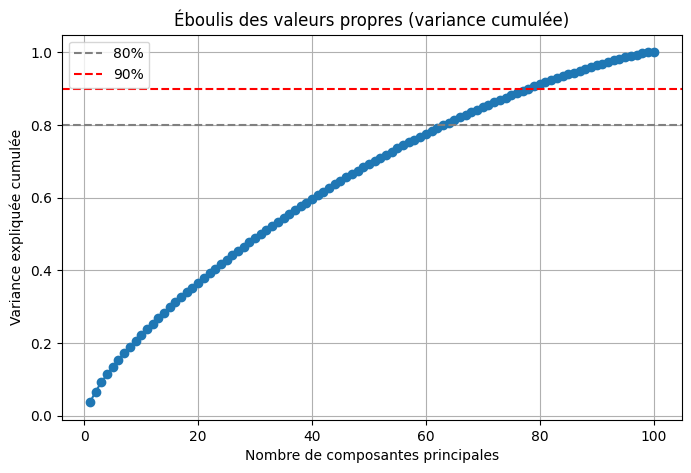

In [246]:
# Affichage éboulis
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_explained)+1), cum_explained, marker="o")# trace la variance expliquée cumulée
plt.axhline(0.8, color="grey", linestyle="--", label="80%")# ligne horizontale à 80%
plt.axhline(0.9, color="red", linestyle="--", label="90%")# ligne horizontale à 90%
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée")
plt.title("Éboulis des valeurs propres (variance cumulée)")
plt.legend()
plt.grid()# Affichage de la grille
plt.show()

Comme attendu , en observant l'éboulis des valeurs propres, nous pouvons donc certifier que pour obtnir une variance cumulée supérieur ou égale à 90% ,  il faut donc prendre en compte environ 80 composantes principales ( soit les 79 obtenue précisément )

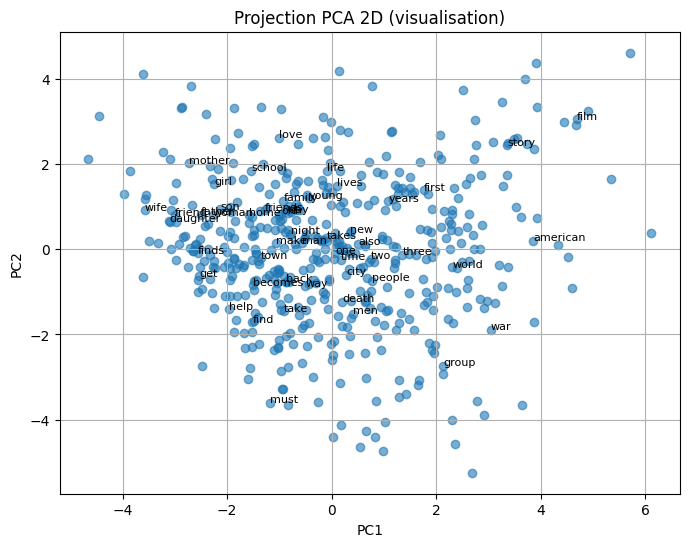

In [247]:
# PCA réduit pour visualisation (2D)
pca_vis = PCA(n_components=2, random_state=42)
X_pca_2d = pca_vis.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.6)
for i, w in enumerate(top_words[:50]):  # annoter seulement les plus fréquents
    plt.annotate(w, (X_pca_2d[i,0], X_pca_2d[i,1]), fontsize=8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection PCA 2D (visualisation)")
plt.grid()
plt.show()


### 4.3 Choix du nombre de clusters (k) 

In [248]:
# Choix du nombre de clusters : elbow + silhouette sur un espace PCA plus riche (ex: 20 comps)
n_pca_clusters = min(50, X_scaled.shape[1])
pca_for_clustering = PCA(n_components=min(20, n_pca_clusters), random_state=42)
X_cluster = pca_for_clustering.fit_transform(X_scaled)

In [249]:
# Évaluation K-means pour k de 2 à 10 en utilisant inertia et silhouette score qui permettent de juger de la qualité du clustering

ks = range(2, 11)
inertia = [] # liste des inerties initialisée 
sil_scores = [] # liste des scores de silhouette
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_cluster)
    inertia.append(km.inertia_)  # ajout de l'inertie à la liste
    sil_scores.append(silhouette_score(X_cluster, km.labels_))  # ajout du score de silhouette

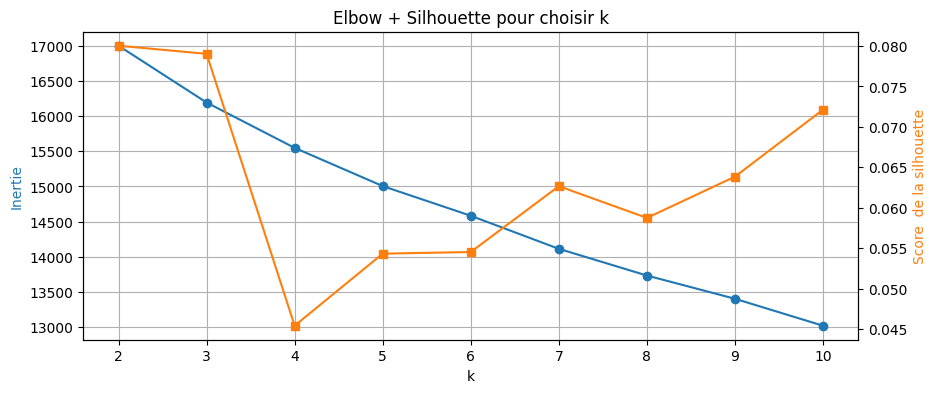

In [250]:
# Plot elbow + silhouette  pour choisir k
fig, ax1 = plt.subplots(figsize=(10,4)) 
ax2 = ax1.twinx() # crée un second axe y partageant le même axe x
ax1.plot(ks, inertia, '-o', color='C0', label='Inertia')
ax2.plot(ks, sil_scores, '-s', color='C1', label='Silhouette')
ax1.set_xlabel('k')
ax1.set_ylabel('Inertie', color='C0')
ax2.set_ylabel('Score  de la silhouette', color='C1')
plt.title('Elbow + Silhouette pour choisir k')
ax1.grid()
plt.show()

Sur cette représentation graphique avec k en axe des x , l'inertie en axe des y , nous avons une elbow à tendance décroissante régulière en bleu et une courbe orange connaissant un pic à 2. Nous allons donc réaliser notre clustering avec un k optimal égale à 2  

In [251]:
# Choisir k optimal (ex: k_opt = argmax(silhouette) )
k_opt = ks[np.argmax(sil_scores)]
print("k optimal (max silhouette) =", k_opt)

k optimal (max silhouette) = 2


### 4.4 Clustering des mots & interprétation 

In [252]:
# Segmenter avec k_opt sur l'espace X_cluster
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
kmeans.fit(X_cluster)
labels = kmeans.labels_


In [253]:
words_pca_df = pd.DataFrame({
    "word": top_words,              # les N mots que tu as pris
    "PC1": X_pca_2d[:, 0],          # coordonnées PCA 2D
    "PC2": X_pca_2d[:, 1],
    "cluster": labels               # labels KMeans (0,1,…)
})

words_pca_df.head()

,word,PC1,PC2,cluster
0,one,0.071282,-0.095401,1
1,life,-0.088389,1.847539,1
2,love,-1.002726,2.620245,1
3,young,-0.437708,1.198962,1
4,man,-0.564274,0.147362,1


In [254]:
# Voir quelques mots typiques par cluster (pour interpréter)
for c in sorted(words_pca_df["cluster"].unique()):
    mots = words_pca_df.query("cluster == @c")["word"].head(20).tolist()
    print(f"Cluster {c} -> {', '.join(mots)}\n")


Cluster 0 -> new, film, story, two, world, years, first, war, people, three, city, men, also, american, group, set, movie, last, live, true

Cluster 1 -> one, life, love, young, man, family, time, woman, find, get, back, girl, father, friends, lives, finds, home, way, must, old



In [255]:
# Donner un nom interprétable à chaque cluster
cluster_names = {
    0: "Récits collectifs & contexte global",
    1: "Vie intime, amour & famille"

}

# Ajouter les noms de clusters dans le DataFrame
words_pca_df["cluster_name"] = words_pca_df["cluster"].map(cluster_names)
words_pca_df.head()

,word,PC1,PC2,cluster,cluster_name
0,one,0.071282,-0.095401,1,"Vie intime, amour & famille"
1,life,-0.088389,1.847539,1,"Vie intime, amour & famille"
2,love,-1.002726,2.620245,1,"Vie intime, amour & famille"
3,young,-0.437708,1.198962,1,"Vie intime, amour & famille"
4,man,-0.564274,0.147362,1,"Vie intime, amour & famille"


In [256]:
# PC1+PC2 = {pc1_var + pc2_var:.1f}% variance
pc1_var, pc2_var = pca_vis.explained_variance_ratio_ * 100

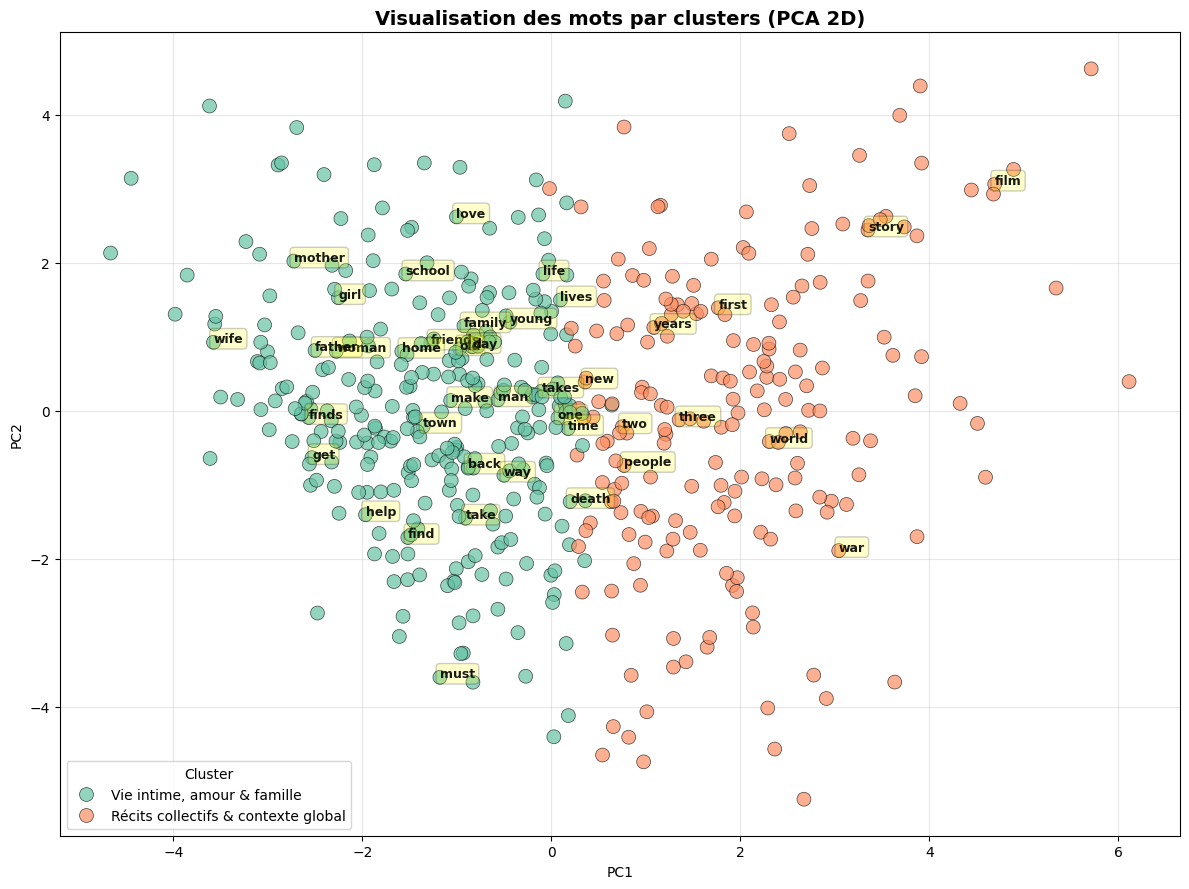

 500 mots visualisés, 40 annotés
 PC1+PC2 = 6.6% variance


In [257]:
# Visualisation finale avec noms de clusters
plt.figure(figsize=(12, 9))
sns.scatterplot(data=words_pca_df, x="PC1", y="PC2", 
                hue="cluster_name", palette="Set2", s=100, alpha=0.7, 
                edgecolor='k', linewidth=0.5)

# Annoter SEULEMENT les 40 premiers mots (les plus fréquents)
for i in range(min(40, len(words_pca_df))):
    row = words_pca_df.iloc[i]
    plt.annotate(row["word"], 
                (row["PC1"], row["PC2"]), 
                fontsize=9, alpha=0.9, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.2))

plt.title("Visualisation des mots par clusters (PCA 2D)", fontsize=14, fontweight='bold')
plt.legend(title="Cluster", fontsize=10) 
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f" {len(words_pca_df)} mots visualisés, {min(40, len(words_pca_df))} annotés")
print(f" PC1+PC2 = {pc1_var + pc2_var:.1f}% variance")

Sur cette représentation de clustering de 500 mots visualisés et 40 mots annotés,nous pouvons avant tout noter que la variance des 2 premières dimensions est relativement faible ( 6.6% de la variance ), ce qui n'est pas étonnant car nous avions noté auparavant qu'il nous fallait un minimum de 79 dimension pour expliquer 90% de la variance. 

De plus sur la gauche, le nuage bleu forme un bloc assez homogène autour de mots ( mother, father, home, wife, girl, family, friend, school, town, young…)  qui met en lumiere tout ce qui tourne autour de la vie intime, des relations proches et du quotidien. Ça colle bien avec le label que tu as posé : “Vie intime, amour & famille”. On est sur un vocabulaire très “micro”, centré sur les personnages et leurs liens personnels.

Par contre, à droite, le nuage orange part sur autre chose : story, film, people, world, war, years, first, time… là on bascule sur des mots plus “macro”, qui décrivent soit le récit en lui-même (story, film), soit un contexte plus large, collectif ou historique (people, world, war, years). Ça colle bien avec “Récits collectifs & contexte global”.

Ce qui est intéressant aussi, c’est la zone un peu au milieu avec des mots comme love, life, family, young, time, people qui se retrouvent à la frontière entre les deux pôles. Ça fait sens : ce sont des notions utilisées à la fois dans des histoires très personnelles et dans des récits plus généraux, donc la PCA les projette naturellement dans une zone “entre-deux”.

En gros, cette figure montre que ton modèle Word2Vec a réussi à structurer le vocabulaire en deux grands univers sémantiques : d’un côté le registre intime et relationnel, de l’autre le registre narratif et contextuel. Ce n’est pas une séparation parfaite (on le savait déjà avec le score de silhouette un peu faible), mais pour une analyse exploratoire, c’est déjà suffisamment propre pour raconter quelque chose sur la manière dont les descriptions de films sont écrites

In [ ]:
# Vérification du clustering
silhouette = silhouette_score(X_cluster, labels)
db_index = davies_bouldin_score(X_cluster, labels)
ch_index = calinski_harabasz_score(X_cluster, labels)

print(f"Silhouette moyen         : {silhouette:.3f}")
print(f"Davies-Bouldin index     : {db_index:.3f} (plus petit = mieux)")
print(f"Calinski-Harabasz index  : {ch_index:.1f} (plus grand = mieux)")

Silhouette moyen         : 0.080
Davies-Bouldin index     : 3.524 (plus petit = mieux)
Calinski-Harabasz index  : 37.0 (plus grand = mieux)


Ici je regarde un peu plus “objectivement” la qualité de mon clustering avec trois indices : silhouette, Davies–Bouldin et Calinski–Harabasz.

Le **silhouette moyen ≈ 0.08** est très faible. En théorie, on est content quand on est plutôt au-delà de 0.25–0.3, voire plus. Là, ça veut dire que les points sont assez proches de la frontière entre les clusters, que les groupes se chevauchent beaucoup et qu’on n’a pas des “blocs” hyper bien séparés. En gros, la structure des clusters est présente mais assez floue.

L’**indice de Davies–Bouldin ≈ 3.52** confirme un peu cette idée. Sur cet indice, plus c’est petit, mieux c’est, car il compare la compacité des clusters à leur séparation. Une valeur autour de 3.5 montre que les clusters ne sont ni très compacts ni très éloignés les uns des autres. Là encore, on est plus sur une segmentation "assez légère" que sur des groupes ultra nets.

Enfin, l’**indice de Calinski–Harabasz ≈ 37** reste correct mais pas énorme. Plus cet indice est élevé, plus la variance entre clusters est grande par rapport à la variance à l’intérieur des clusters. Ici, il y a bien un peu de structure, mais on n’est clairement pas dans un cas où les clusters explosent visuellement la séparation.

En résumé, ces trois indices racontent tous la même histoire : le clustering des mots dans l’espace Word2Vec capture quelques grandes tendances  mais la séparation reste globalement faible. Du coup, j’utilise ces clusters surtout comme **outil exploratoire et de storytelling** sur le vocabulaire des films, pas comme une segmentation “detaillé” sur laquelle je prendrais des décisions critiques.


### 4.5 Visualisation t-SNE  

In [259]:
# 1) PCA -> 50 dimensions pour préparer t-SNE
pca_50 = PCA(n_components=min(50, X_scaled.shape[1]), random_state=42)
X_pca_50 = pca_50.fit_transform(X_scaled)



In [260]:


# 2) t-SNE 2D
tsne = TSNE(
    n_components=2,
    perplexity=30,      # à ajuster éventuellement (entre 20 et 50)
    learning_rate=200,
    init='pca',
    random_state=42
)

X_tsne_2d = tsne.fit_transform(X_pca_50)



In [261]:
# DataFrame pour les résultats
words_tsne_df = pd.DataFrame({
    "word": top_words,
    "TSNE1": X_tsne_2d[:, 0],
    "TSNE2": X_tsne_2d[:, 1],
    "cluster": labels  # tu peux le garder si tu veux pour d'autres graphiques
})
words_tsne_df["cluster_name"] = words_tsne_df["cluster"].map(cluster_names)


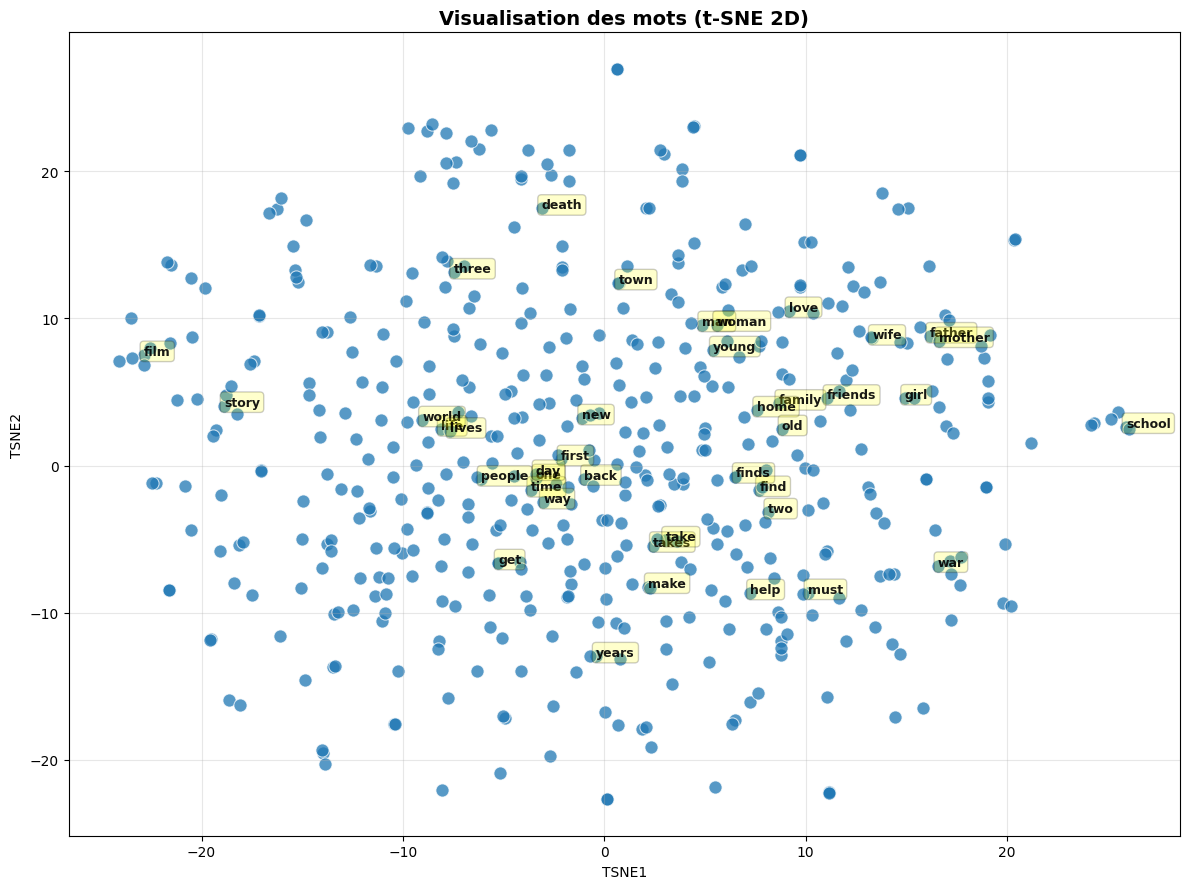

In [262]:
# ===== Visualisation t-SNE SANS couleurs de cluster =====
plt.figure(figsize=(12, 9))
sns.scatterplot(
    data=words_tsne_df,
    x="TSNE1",
    y="TSNE2",
    s=90,
    alpha=0.75
)

# On annote quelques mots représentatifs (par ex. 40 premiers)
for i in range(min(40, len(words_tsne_df))):
    row = words_tsne_df.iloc[i]
    plt.annotate(
        row["word"],
        (row["TSNE1"], row["TSNE2"]),
        fontsize=9,
        alpha=0.9,
        fontweight="bold",
        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.2)
    )

plt.title("Visualisation des mots (t-SNE 2D)",
          fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Cette figure montre la projection 2D de mes embeddings Word2Vec avec **t-SNE**.  
L’idée ici n’est pas de voir des “gros” clusters bien découpés, mais plutôt de regarder comment les mots se regroupent localement dans le plan.

On voit par exemple que tout le champ lexical de la famille et de la vie intime se retrouve plus ou moins dans la même zone : mother, father, family, friends, wife, girl, home, young, etc. Ces mots sont assez proches les uns des autres, ce qui confirme que le modèle a bien capté qu’ils apparaissent souvent dans des contextes similaires (relations, vie quotidienne, drame familial, etc.).

De l’autre côté, des mots comme film et story sont plutôt isolés sur la gauche, ce qui correspond davantage à un vocabulaire méta sur le récit lui-même (on parle du film en tant qu’objet, pas seulement de ce qui se passe dedans). On a aussi des mots comme world, people, lives, qui se situent plus vers le centre et jouent un peu le rôle de “pont” entre le registre intime et un registre plus global.

Globalement, la carte t-SNE confirme ce que racontaient déjà la PCA et le clustering :  
le modèle Word2Vec arrive à structurer le vocabulaire en petits **blocs sémantiques locaux** cohérents (famille, relations, monde, récit…), même si la séparation globale n’est pas ultra nette. Visuellement, c’est surtout un outil de **storytelling** qui permet de montrer que les mots “qui vont ensemble” dans les descriptions de films se retrouvent aussi proches dans l’espace vectoriel appris par le modèle.
